## 개념 정리
### 용어 정리
- 심층신경망: 2개 이상의 층을 포함한 신경망.
    - 하이퍼 파라미터: 은닉층의 갯수 / 은닉층의 뉴런 갯수 / 활성화 함수 종류 / 층의 종류 / 옵티마이저(매개변수)
- 은닉층
    - 입력층과 출력층 사이에 있는 모든 층
    - 은닉층에는 대부분 활성화함수를 사용함.
        - 이는, 선형 방정식의 계산값(이전 층의 출력)을 변화시켜, 다른 층에서도 사용할 수 있도록 만들기 위함이다.
- Sigmoid 함수
    - 은닉층에서 많이 사용하는 활성화 함수 중 하나.
    - 입력값이 음수이면 0~0.5, 양수이면 0.5~1 사이의 값을 출력해준다.
- ReLU 함수
    - 이미지 분류 모델의 은닉층이 많이 사용하는 활성화함수
    - 입력값이 음수이면 0, 양수이면 입력값을 출력함.
    - Sigmoid는 층이 많을 수록, 함수 양 끝에서 값의 변화가 적기 때문에 학습이 어려움
- 옵티마이저
    - 신경망의 가중치와 절편을 학습하기 위한 알고리즘 or 방법
    - Keras에는 다양한 경사하강법 알고리즘이 있는데, SGD, 네스테로프 모멘텀, RMSProp, Adam 등이 있음
### 핵심 라이브러리와 함수 (Tensorflow)
- model.add()
    - 모델에 층을 추가하는 메소드
    - keras.layers 패키지 아래에 있는 층의 객체를 입력받아 신경망 모델에 추가함
    - 이 함수를 호출하면, 층이 차례대로 늘어남
- model.summary()
    - 모델의 정보를 출력하는 메소드
    - 모델의 이름과, 추가된 층의 종류와 순서, 모델 파라미터 갯수를 출력
    - add()에서 name 매개변수를 지정하면, summary()에서 층을 구분하기 쉬워짐.
- SGD
    - 기본 경사하강법 옵티마이저 클래스
    - laerning_rate: 학습률을 지정하며, 기본값은 0.01
    - momentum: 0이상을 지정하면 모멘텀 최적화(기존 그레이언트를 더해, 새로운 학습률로 사용)를 수행함
    - nesterov: True로 설정하면 네스테로프 모멘텀 최적화(모멘텀 최적화 + 활성화함수에 그레디언트 입력한 값 / 모멘텀 최적화를 2번 반복)를 수행함
- Adagrad
    - Adagrad 옵티마이저 클래스
    - laerning_rate: 학습률을 지정하며, 기본값은 0.01
    - 그레디언트 제곱을 누적하여 학습률을 나눔
    - initial_accumulator_value: 그레디언트 누적 조기값을 지정, 기본 값은 0.1
- RMSprop
    - RMSProp 옵티마이저 클래스
    - laerning_rate: 학습률을 지정하며, 기본값은 0.01
    - 그레디언트 제곱으로 학습률을 나누지만, 최근의 그레디언트를 사용하기 위해 지수 감소를 사용함
    - rho: 지수 감소 비율을 지정, 기본값은 0.9
- Adam
    - Adam 옵티마이저 클래스
    - laerning_rate: 학습률을 지정하며, 기본값은 0.01
    - beta_1: 모멘텀 최적화에 있는 그레디언트 지수 감소 평균을 조절. 기본값은 0.9
    - beta_2: RMSProp에 있는 그레디언트 제곱의 지수 감소 평균을 조절. 기본값은 0.999
- [옵티마이저에 대한 자세한 설명 보기](https://box-world.tistory.com/69)

In [1]:
'''데이터 불러오기'''
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
'''데이터 변환하고, 검증 데이터 분리하기'''
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0 # 기존 데이터(픽셀값)는 255까지 있음. 255를 나누면 0~1사이의 값이 나옴
train_scaled = train_scaled.reshape(-1,28*28) # 이미지 크기(28*28)에 맞춰 reshape
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42) # 검증용 데이터 생성

In [9]:
'''심층 신경망 만들기 #1: 층을 각각의 변수로 정의'''
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape=(784,)) # 입력층 정의
dense2 = keras.layers.Dense(10, activation='softmax') # 출력층 정의
model = keras.Sequential([dense1, dense2]) # 출력층은 가장 마지막에 위치해야 함
model.summary()
# (None, 100): 첫번째 차원은 샘플의 갯수를 의미함. 여기서는 미니 배치 경사하강법(배치 사이즈에 따라 데이터를 나누고 학습을 진행)을 하기 때문에, 샘플의 갯수를 지정하지 않음. 두번째 차원은 출력의 갯수를 의미함.
# 78500: 각 층의 총 파라미터 수 = (모델 파라미터 갯수 * 출력 갯수) + 출력 갯수 // 끝에 더해주는 출력갯수는 절편(bias)값을 의미한다.
# Non-trainable params: 훈련되지 않은 파라미터 갯수

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
'''심층 신경망 만들기 #2: Sequential 클래스의 생성자의 리스트 안에 층을 정의'''
model = keras.Sequential([
    keras.layers.Dense(100, activation = 'sigmoid', input_shape=(784,)),
    keras.layers.Dense(10, activation = 'softmax')
], name = '패션 MNIST 모델')
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
'''심층 신경망 만들기 #3: Sequential 클래스의 add()에 정의'''
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) # 데이터를 1차원으로 변환하는 Flatten 층. 인공신경망의 성능에 기여하진 않음.
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.summary() # flatten 층을 추가하여, 입력값을 알 수 있음. Keras에서는 입력 데이터에 대한 전처리층을 두는 것을 권장함.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
'''모델 구성하고 훈련하기'''
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5,  verbose = 1)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5669 - accuracy: 0.8055
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4098 - accuracy: 0.8525
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3733 - accuracy: 0.8647
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3501 - accuracy: 0.8729
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3329 - accuracy: 0.8788


[0.8054583072662354, 0.8525416851043701, 0.8647291660308838, 0.8728749752044678, 0.8788333535194397]


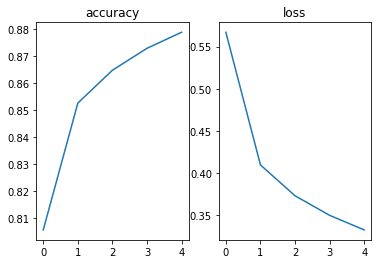

375/375 [==============================] - 1s 1ms/step - loss: 0.3471 - accuracy: 0.8750


[0.347080796957016, 0.875]

In [7]:
'''학습 결과 시각화'''
# 정확도 점수 보기
print(history.history['accuracy'])
# 정확도, 손실값 그래프로 시각화
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
axs[0].plot(history.history['accuracy'])
axs[0].set_title('accuracy')
axs[1].plot(history.history['loss'])
axs[1].set_title('loss')
plt.show()
# 학습 평가
model.evaluate(val_scaled, val_target)

In [ ]:
'''옵티마이저 사용 예시'''
# SGD
model.compile(optimizer = 'sgd', loss='sparse_categorical_crossentropy', metrics='accuracy') # optimizer 매개변수를 이용해 사용
sgd = keras.optimizers.SGD()
model.compile(optimizer = sgd, loss='sparse_categorical_crossentropy', metrics='accuracy') # optimizer 클래스를 선언해 사용
sgd = keras.optimizers.SGD(learning_rate = 0.1) # learning_rate를 지정할 수 있음
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True) # 네스테로프 모멘텀 최적화 사용

# Adagrad
model.compile(optimizer = 'adagrad', loss='sparse_categorical_crossentropy', metrics='accuracy') # optimizer 매개변수를 이용해 사용
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer = adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy') # optimizer 클래스를 선언해 사용

In [8]:
'''Adam 옵티마이저를 이용한 학습'''
# 모델 구성하기
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
# 모델 학습하기
model.fit(train_scaled, train_target, epochs=5)
# 모델 평가하기
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5204 - accuracy: 0.8169
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3882 - accuracy: 0.8607
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3484 - accuracy: 0.8723
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3237 - accuracy: 0.8816
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8804


[0.3315883278846741, 0.8804166913032532]